In [1]:
!wget https://github.com/phanakata/ML_for_kirigami_design/raw/master/mddata/15grid_shuffled.dat

--2019-10-01 12:50:31--  https://github.com/phanakata/ML_for_kirigami_design/raw/master/mddata/15grid_shuffled.dat
Resolving github.com... 140.82.113.3
Connecting to github.com|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/phanakata/ML_for_kirigami_design/master/mddata/15grid_shuffled.dat [following]
--2019-10-01 12:50:31--  https://raw.githubusercontent.com/phanakata/ML_for_kirigami_design/master/mddata/15grid_shuffled.dat
Resolving raw.githubusercontent.com... 151.101.20.133
Connecting to raw.githubusercontent.com|151.101.20.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13405950 (13M) [text/plain]
Saving to: ‘15grid_shuffled.dat’

15grid_shuffled.dat 100%[===================>]  12.78M  7.22MB/s    in 1.8s    

2019-10-01 12:50:33 (7.22 MB/s) - ‘15grid_shuffled.dat’ saved [13405950/13405950]



In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Explore data

In [3]:
raw_data = np.loadtxt('./15grid_shuffled.dat')
raw_data.shape

(29791, 18)

In [4]:
# ref: https://github.com/phanakata/ML_for_kirigami_design/blob/master/models/CNN_regression/convert_coarse_to_fine.ipynb
labels = ['cell {}'.format(i) for i in range(15)] + ['strain', 'toughness', 'stress']
df = pd.DataFrame(raw_data, columns=labels)
df.tail(3)

,cell 0,cell 1,cell 2,cell 3,cell 4,cell 5,cell 6,cell 7,cell 8,cell 9,cell 10,cell 11,cell 12,cell 13,cell 14,strain,toughness,stress
29788,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.333835,6.506810,30.906698
29789,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.438874,11.327624,39.040404
29790,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.253778,5.378272,36.376711


In [5]:
df['cut_density'] = 1 - df.iloc[:,0:15].mean(axis=1)
df.tail(3)

,cell 0,cell 1,cell 2,cell 3,cell 4,cell 5,cell 6,cell 7,cell 8,cell 9,cell 10,cell 11,cell 12,cell 13,cell 14,strain,toughness,stress,cut_density
29788,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.333835,6.506810,30.906698,0.400000
29789,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.438874,11.327624,39.040404,0.466667
29790,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.253778,5.378272,36.376711,0.333333


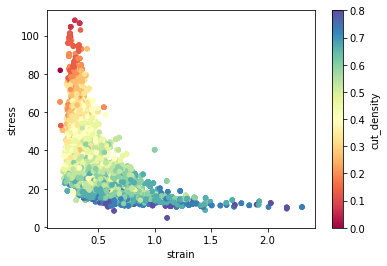

In [6]:
# reproduce Fig. 1 in the paper https://arxiv.org/abs/1808.06111
df.plot.scatter(x='strain', y='stress', c='cut_density', cmap=plt.cm.Spectral)

# Fit simple model

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [8]:
X = raw_data[:,0:15]
y = raw_data[:,15]  # strain
X.shape, y.shape

((29791, 15), (29791,))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((23832, 15), (5959, 15))

## Single model

In [10]:
model = MLPRegressor()

%time model.fit(X_train, y_train)

CPU times: user 2.02 s, sys: 12.1 ms, total: 2.04 s
Wall time: 1.04 s


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [11]:
%time y_train_pred = model.predict(X_train)
r2_score(y_train, y_train_pred)

CPU times: user 27.8 ms, sys: 8.2 ms, total: 36 ms
Wall time: 21.2 ms


0.8639879163949882

In [12]:
%time y_test_pred = model.predict(X_test)
r2_score(y_test, y_test_pred)

CPU times: user 9.22 ms, sys: 2.85 ms, total: 12.1 ms
Wall time: 6.86 ms


0.8589337642480326

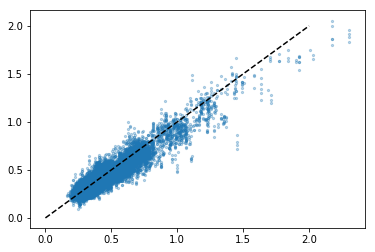

In [13]:
plt.scatter(y_train, y_train_pred, alpha=0.3, s=5)
plt.plot([0, 2], [0, 2], '--', c='k')

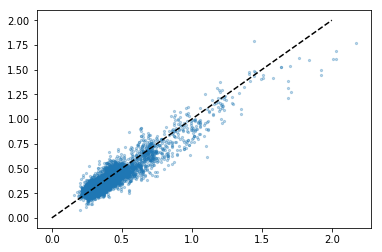

In [14]:
plt.scatter(y_test, y_test_pred, alpha=0.3, s=5)
plt.plot([0, 2], [0, 2], '--', c='k')

## Multiple models

In [15]:
def model_fit_evaluate(model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    """Fit and evaluate a single sklearn model"""
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    fig, axes = plt.subplots(1, 2, figsize=[10, 4])
    axes[0].scatter(y_train, y_train_pred, alpha=0.3, s=5)
    axes[0].set_title('training set; r2={:.3f}'.format(r2_train))
    axes[1].scatter(y_test, y_test_pred, alpha=0.3, s=5)
    axes[1].set_title('test set; r2={:.3f}'.format(r2_test))  
    
    for ax in axes:
        ax.plot([0, 2], [0, 2], '--', c='k')
        ax.set_xlabel('true')
        ax.set_ylabel('predict')

Just use default hyper-parameters here. Can further fine tune.

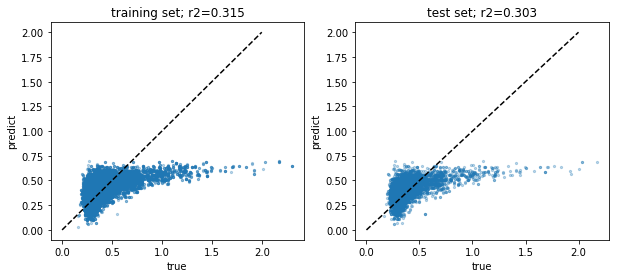

In [16]:
model_fit_evaluate(LinearRegression())

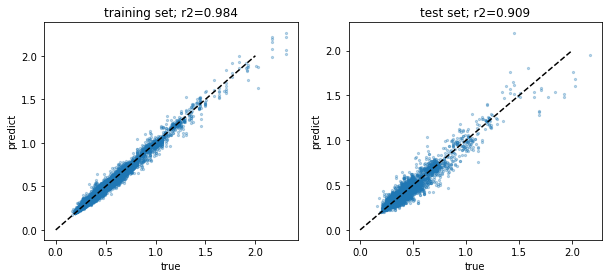

In [17]:
model_fit_evaluate(RandomForestRegressor())

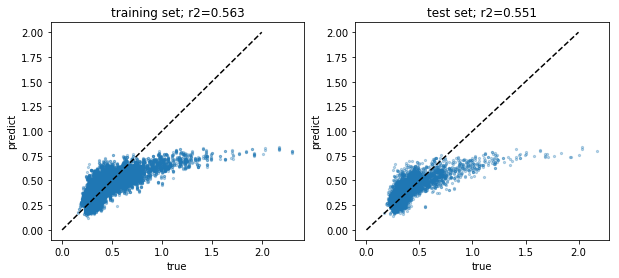

In [18]:
model_fit_evaluate(GradientBoostingRegressor())

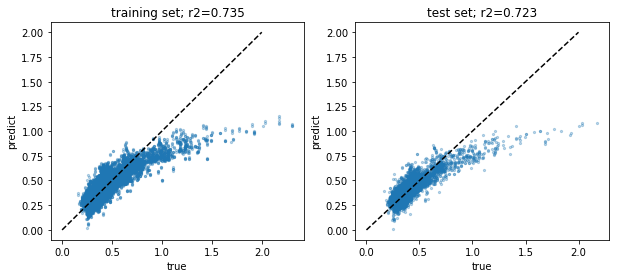

In [19]:
model_fit_evaluate(SVR())